**The idea is build a CNN for clasificate images of the dataset "cifar10", the which content cars, boats, airplanes, etc.**

In [ ]:
#Packages:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import mnist,f
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load the data:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
x_train.shape #I have 50000 images of train where every one have resolution of 32x32 and is in RGB space color

(60000, 28, 28)

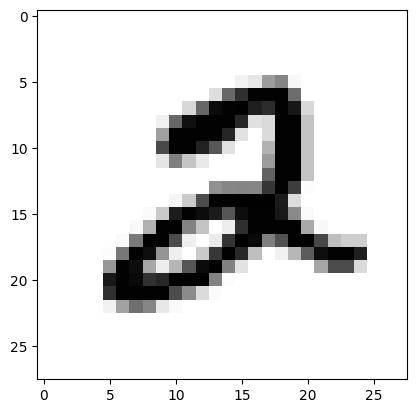

In [ ]:
#Painting a image:
plt.imshow(x_train[5],cmap='binary')

#Preprocessing:

In [ ]:
#Normalizing the images with MinMaxScaler:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [ ]:
len(np.unique(y_train)) #I have only 10 classes

10

In [ ]:
#Binarizing the labels:
#y_train=to_categorical(y_train,10)
#y_test=to_categorical(y_test,10)

In [ ]:
y_train[0]

5

In [ ]:
#Train_test_val_split:
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

#Building the model

In [ ]:
base_filtros=32 #Number of Kernels in the convolutional layers
w_regularizer=1e-4 #weight of the relularizer

In [ ]:
from keras.api._v2.keras import regularizers
model=Sequential()

#First convolution layer:
model.add(Conv2D(base_filtros*4,(3,3),activation='relu',padding="same", input_shape=(28,28,1))) #put a regularizer with l2

#Second convolution layer:
model.add(Conv2D(base_filtros*4,(3,3),activation='relu',padding="same")) #put a regularizer with l2
model.add(MaxPooling2D(pool_size=(2,2))) #First MaxPooling Layer


#Convolution layer number 3 (Iqual but increase the number of kernels):
model.add(Conv2D(3*base_filtros,(3,3),activation='relu',padding="same")) #put a regularizer with l2


#Convolution layer number 4:
model.add(Conv2D(3*base_filtros,(3,3),activation='relu',padding="same")) #put a regularizer with l2
model.add(MaxPooling2D(pool_size=(2,2))) #Second MaxPooling Layer


#Convolution layer number 5 (increase the number of kernels):
model.add(Conv2D(2*base_filtros,(3,3),activation='relu',padding="same")) #put a regularizer with l2u

#Convolution layer number 6:
model.add(Conv2D(2*base_filtros,(3,3),activation='relu',padding="same")) #put a regularizer with l2
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling Layer Number three

#Classifiation (with dense layer) and Flatten:
model.add(Flatten())
model.add(Dense(10,activation="softmax"))


In [ ]:
#architecture of the model:
model.summary() #Efectly the convolution layers increase the depth of my tensor and the pooling layer decrease the resolution of my tensor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 96)        110688    
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 96)        83040     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 96)          0         
 g2D)                                                   

In [ ]:
import tensorflow as tf

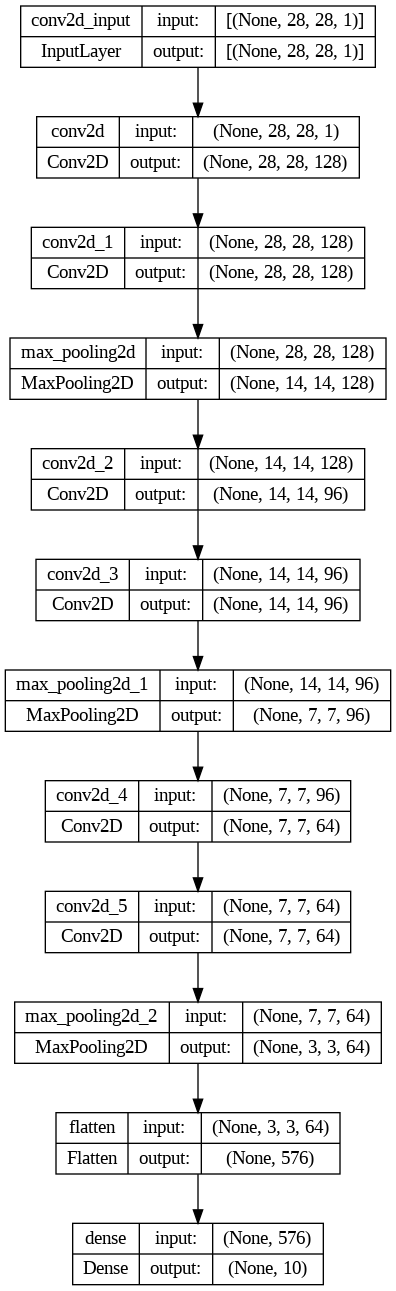

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
#Compile the model:
model.compile(metrics=["accuracy"],loss="sparse_categorical_crossentropy",optimizer="rmsprop")

In [ ]:
#Training the model:
history=model.fit(x_train,y_train,batch_size=32,epochs=5,validation_data=(x_valid,y_valid),verbose=2,shuffle=True)

Epoch 1/5
1719/1719 - 25s - loss: 0.1362 - accuracy: 0.9562 - val_loss: 0.0729 - val_accuracy: 0.9746 - 25s/epoch - 14ms/step
Epoch 2/5
1719/1719 - 13s - loss: 0.0414 - accuracy: 0.9877 - val_loss: 0.0319 - val_accuracy: 0.9924 - 13s/epoch - 8ms/step
Epoch 3/5
1719/1719 - 13s - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0292 - val_accuracy: 0.9928 - 13s/epoch - 8ms/step
Epoch 4/5
1719/1719 - 13s - loss: 0.0231 - accuracy: 0.9935 - val_loss: 0.0357 - val_accuracy: 0.9914 - 13s/epoch - 8ms/step
Epoch 5/5
1719/1719 - 13s - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0470 - val_accuracy: 0.9910 - 13s/epoch - 8ms/step


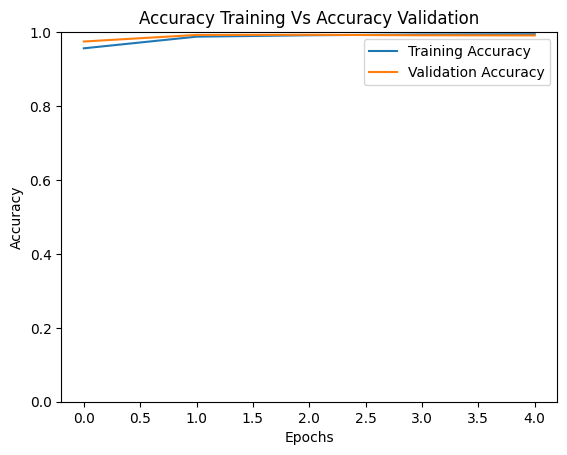

In [ ]:
#Plotting the accuracy:
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Training Vs Accuracy Validation")
plt.legend(loc="best")
plt.ylim([0,1])
plt.show()

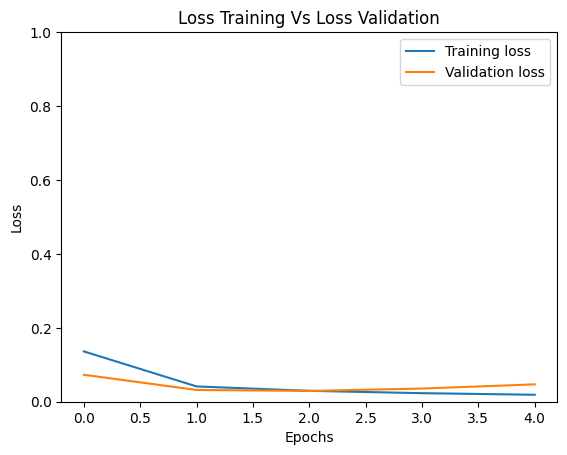

In [ ]:
#Plotting the loss:
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Training Vs Loss Validation")
plt.legend(loc="best")
plt.ylim([0,1])
plt.show()

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0341 - accuracy: 0.9937


[0.03405829146504402, 0.9937000274658203]

**How we can see, the performance is not very good**